In [136]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [137]:
#1 натриевая лампа
#начинаем с n = 5 ближние к центру для последнего пункта
r_upper = np.array([166.12, 164.98, 163.89, 162.30, 160.32])
r_lower = np.array([148.81, 150, 151.05, 152.65, 154.55])


r_third_to_center_lower = 150.82 
r_third_to_center_upper = 150.97
dr = r_third_to_center_upper - r_third_to_center_lower

f = 9.4 #cm
L = 90#mkm
r = 0.77 #mkm





In [138]:
m = 2 * 0.1 / 5800 * 1e7
m

344.82758620689657

In [139]:
#2 ртутная лампа
#начинаем с n = 5 ближние к центру для последнего пункта
r_green_upper = np.array([197.80, 196.30, 194.35, 191.34, 187.45])
r_green_lower = np.array([164.92, 167.15, 169.05, 171.55, 175.36])


r_yellow_upper_inner = np.array([198.77, 196.96, 194.63, 191.80, 187.95])
r_yellow_lower_inner = np.array([164.20, 166.12, 168.32, 170.76, 174.33])

r_yellow_upper_outer = np.array([199.32, 197.46, 195.31, 192.72, 189.17])
r_yellow_lower_outer = np.array([163.64, 165.61, 167.63, 170.17, 173.34])

r_third_to_center_lower_green = 193.77
r_third_to_center_upper_green = 194.05
dr = r_third_to_center_upper - r_third_to_center_lower

r_third_to_center_lower_yellow = 194.20
r_third_to_center_upper_yellow = 194.44

f_l0 = 50 #mm
f_l1 = 110 #mm
L = 0.1 #mm



In [140]:
#3 обработка результатов

lam = 5461 #Angstrem
di2 = (r_green_upper - r_green_lower)**2

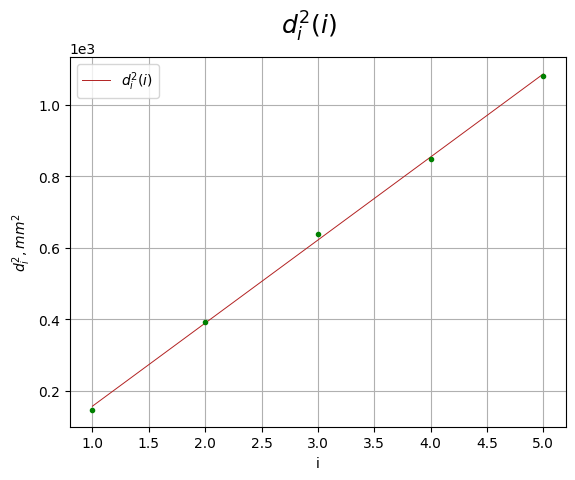

232.79310000000044 16.856290765598548


In [141]:

plt=reload(plt)
f_ot_x = di2
x = np.array(range(5, 0, -1))
ox = x
oy = f_ot_x
yerr = oy*0.04 / (r_green_upper - r_green_lower)
w = w = 1.0 / (yerr**2)


plt.errorbar(
    ox,  # ординаты точек
    oy,  # абсциссы точек
    linestyle='',
    xerr = 0,
    yerr = yerr,
    marker=".",
    elinewidth=1,
    color = 'green',
)

coeff = np.polyfit(ox[:16], oy[:16], 1, full=False, cov=True)
p1 = np.poly1d(coeff[0])
plt.plot(ox[:], p1(ox[:]), linewidth=0.7, label='$d^{2}_{i}(i)$', color='firebrick')


plt.xlabel('i')
plt.ylabel('$d^{2}_{i}, mm^2$')


plt.suptitle('$d^{2}_{i}(i)$ ', fontsize=18)



plt.legend(loc='best')
plt.plot(figsize=(3, 3))
plt.ticklabel_format(scilimits=(5, 2))
plt.grid(True)
plt.show()

k = coeff[0][0]
sigmak = coeff[1][0][0]

print(k, sigmak)

In [142]:
L_interferometra = lam * 4 * f**2 / k * 1e-5
sigmaL = L_interferometra * sigmak / k
print(L_interferometra, sigmaL)



0.08291207256572454 0.00600357142521087


In [143]:
d_avg = (r_yellow_upper_outer - r_yellow_lower_outer + r_yellow_upper_inner - r_yellow_lower_inner) / 2
print(d_avg)
delta_d = r_yellow_upper_outer - r_yellow_lower_outer - r_yellow_upper_inner + r_yellow_lower_inner
print(delta_d)
sigma_d_avg = 4*0.02 / 2
sigma_delta = 4*0.02

[35.125 31.345 26.995 21.795 14.725]
[1.11 1.01 1.37 1.51 2.21]


(array([35.95452152, -0.86582579]), array([[ 54.29261191, -40.56382657],
       [-40.56382657,  32.2284765 ]]))


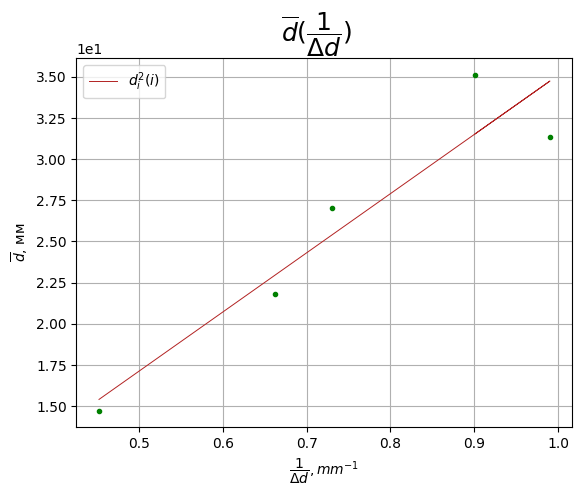

35.95452151882015 54.29261190608696


In [144]:

plt=reload(plt)
f_ot_x = d_avg
x = 1.0 / delta_d
ox = x[:]
oy = f_ot_x[:]
xerr = x * (sigma_delta / delta_d)
yerr = sigma_d_avg
# w = np.sqrt((1.0 / (yerr**2))*(1.0 / (xerr**2)))


plt.errorbar(
    ox,  # ординаты точек
    oy,  # абсциссы точек
    linestyle='',
    xerr = 0,
    yerr = 0,
    marker=".",
    elinewidth=1,
    color = 'green',
)

coeff = np.polyfit(ox[:], oy[:], 1, full=False, cov=True)
print(coeff)
p1 = np.poly1d(coeff[0])
plt.plot(ox[:], p1(ox[:]), linewidth=0.7, label='$d^{2}_{i}(i)$', color='firebrick')


plt.xlabel('$\dfrac{1}{\Delta d}, mm^{-1}$')
plt.ylabel('$\overline{d}$, мм')


plt.suptitle('$\overline{d}$($\dfrac{1}{\Delta d}$)', fontsize=18)



plt.legend(loc='best')
plt.plot(figsize=(3, 3))
plt.ticklabel_format(scilimits=(5, 2))
plt.grid(True)
plt.show()

k = coeff[0][0]
sigmak = coeff[1][0][0]

print(k, sigmak)

In [145]:
delta_lambda = 56 * k / (4 * f**2)
delta_lambda

5.696732698771866

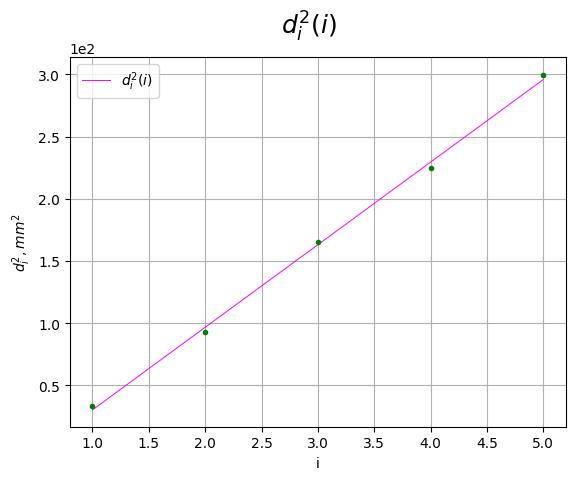

66.39643000000001 2.161029156366643
L =  0.3136948658233583
0.010266377426946274


In [146]:
di_natr_2 = (r_lower - r_upper)**2
plt=reload(plt)
f_ot_x = di_natr_2
x = np.array(range(5, 0, -1))
ox = x
oy = f_ot_x
yerr = oy*0.04 / (r_upper - r_lower)
w = w = 1.0 / (yerr**2)


plt.errorbar(
    ox,  # ординаты точек
    oy,  # абсциссы точек
    linestyle='',
    xerr = 0,
    yerr = yerr,
    marker=".",
    elinewidth=1,
    color = 'green',
)

coeff = np.polyfit(ox[:16], oy[:16], 1, full=False, cov=True)
p1 = np.poly1d(coeff[0])
plt.plot(ox[:], p1(ox[:]), linewidth=0.7, label='$d^{2}_{i}(i)$', color='magenta')


plt.xlabel('i')
plt.ylabel('$d^{2}_{i}, mm^2$')


plt.suptitle('$d^{2}_{i}(i)$ ', fontsize=18)



plt.legend(loc='best')
plt.plot(figsize=(3, 3))
plt.ticklabel_format(scilimits=(5, 2))
plt.grid(True)
plt.show()

k = coeff[0][0]
sigmak = coeff[1][0][0]

print(k, sigmak)

print("L = ", 4 * f**2 * 5893 / k / 100000)

print(4 * f**2 * 5893 / k / 100000 * 2.16/66)

In [155]:
D_exp = delta_d / (2*delta_lambda) * 100

D_theor = f**2 / (lam * (r_green_upper - r_green_lower)) * 1000

print(np.round(D_exp, 2))
print(np.round(D_theor, 2))


#для натрия

D_nat_exp = delt


[0.53 0.48 0.65 0.72 1.05]
[0.49 0.56 0.64 0.82 1.34]


In [163]:
Rapp = 4* f**2/ (r_third_to_center_upper - r_third_to_center_lower) / dr / 3
Q = 2 * np.pi / lam / 0.15 * 1000000
Q/345


22.232962613878072